In [1]:
from tqdm import tqdm
import ATFMSimulation
import Setup
import logging
import LoggingConfiguration
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import json
import pandas as pd

In [2]:
# Initialize the simulation model with parameters from Setup
model = ATFMSimulation.ATFMSimulationModel(
                                            n_times = Setup.n_times_, 
                                            seed = Setup.starting_seed_,
                                            time_assignment_strategy = Setup.time_assignment_strategy,   
                                            network_manager_agent = Setup.network_manager_agent_,
                                            list_airline_agents = Setup.list_airline_agents_,
                                            platform_agent = Setup.platform_agent_
                                                )
LoggingConfiguration.configure_logging()
for i in tqdm(range(Setup.steps), desc="Simulation Progress", unit="step", leave = False, dynamic_ncols=True):
    model.step()

Simulation Progress:   0%|          | 0/100 [00:00<?, ?step/s]C:\Users\Mauricio\Desktop\Thesis\0. Framwork\Code\ATFM_simulation_framework_uploaded_to_github_v5\credits_clearing.py:205: RuntimeWarning: invalid value encountered in divide
  self.ratio = (self.sum_net_opt - self.net_ideal_util) / self.net_ideal_util
C:\Users\Mauricio\Desktop\Thesis\0. Framwork\Code\ATFM_simulation_framework_uploaded_to_github_v5\credits_clearing.py:205: RuntimeWarning: invalid value encountered in divide
  self.ratio = (self.sum_net_opt - self.net_ideal_util) / self.net_ideal_util
Simulation Progress:   2%|▏         | 2/100 [00:00<00:08, 10.97step/s]C:\Users\Mauricio\Desktop\Thesis\0. Framwork\Code\ATFM_simulation_framework_uploaded_to_github_v5\credits_clearing.py:205: RuntimeWarning: invalid value encountered in divide
  self.ratio = (self.sum_net_opt - self.net_ideal_util) / self.net_ideal_util
Simulation Progress:   4%|▍         | 4/100 [00:00<00:07, 12.03step/s]C:\Users\Mauricio\Desktop\Thesis\0. Fra

There was no weight map or no regulation schedule


C:\Users\Mauricio\Desktop\Thesis\0. Framwork\Code\ATFM_simulation_framework_uploaded_to_github_v5\credits_clearing.py:205: RuntimeWarning: invalid value encountered in divide
  self.ratio = (self.sum_net_opt - self.net_ideal_util) / self.net_ideal_util
C:\Users\Mauricio\Desktop\Thesis\0. Framwork\Code\ATFM_simulation_framework_uploaded_to_github_v5\credits_clearing.py:205: RuntimeWarning: invalid value encountered in divide
  self.ratio = (self.sum_net_opt - self.net_ideal_util) / self.net_ideal_util
Simulation Progress:  21%|██        | 21/100 [00:01<00:04, 17.06step/s]C:\Users\Mauricio\Desktop\Thesis\0. Framwork\Code\ATFM_simulation_framework_uploaded_to_github_v5\credits_clearing.py:205: RuntimeWarning: invalid value encountered in divide
  self.ratio = (self.sum_net_opt - self.net_ideal_util) / self.net_ideal_util
Simulation Progress:  23%|██▎       | 23/100 [00:01<00:04, 15.40step/s]C:\Users\Mauricio\Desktop\Thesis\0. Framwork\Code\ATFM_simulation_framework_uploaded_to_github_v5\c

There was no weight map or no regulation schedule


Simulation Progress:  59%|█████▉    | 59/100 [00:04<00:03, 11.56step/s]C:\Users\Mauricio\Desktop\Thesis\0. Framwork\Code\ATFM_simulation_framework_uploaded_to_github_v5\credits_clearing.py:205: RuntimeWarning: invalid value encountered in divide
  self.ratio = (self.sum_net_opt - self.net_ideal_util) / self.net_ideal_util
Simulation Progress:  65%|██████▌   | 65/100 [00:04<00:03, 11.18step/s]C:\Users\Mauricio\Desktop\Thesis\0. Framwork\Code\ATFM_simulation_framework_uploaded_to_github_v5\credits_clearing.py:205: RuntimeWarning: invalid value encountered in divide
  self.ratio = (self.sum_net_opt - self.net_ideal_util) / self.net_ideal_util
C:\Users\Mauricio\Desktop\Thesis\0. Framwork\Code\ATFM_simulation_framework_uploaded_to_github_v5\credits_clearing.py:205: RuntimeWarning: invalid value encountered in divide
  self.ratio = (self.sum_net_opt - self.net_ideal_util) / self.net_ideal_util
Simulation Progress:  69%|██████▉   | 69/100 [00:05<00:02, 11.31step/s]C:\Users\Mauricio\Desktop\Th

In [3]:
with open('output_data.json', 'r') as json_file:
    # Load the JSON data from the file
    data = json.load(json_file)
data_ = pd.DataFrame(data)

In [4]:
print(data_)

      step    airline flight_number  scheduled_time  assigned_time  \
0        0  Airline_1           NaN             NaN            NaN   
1        0  Airline_2           NaN             NaN            NaN   
2        0  Airline_3           NaN             NaN            NaN   
3        0  Airline_4           NaN             NaN            NaN   
4        0  Airline_5           NaN             NaN            NaN   
...    ...        ...           ...             ...            ...   
2457   100  Airline_6   Airline_6_3            52.0           75.0   
2458   100  Airline_6   Airline_6_4            58.0           81.0   
2459   100  Airline_6   Airline_6_6            74.0           92.0   
2460   100  Airline_6   Airline_6_7            63.0           84.0   
2461   100  Airline_6   Airline_6_9            65.0           85.0   

      desired_time  optimization_time  intervened  time_assignment_seed  \
0              NaN                NaN         NaN                   NaN   
1        

In [5]:
# Group by 'Airlines' and 'Step', and sum the 'Credits'
df_grouped = data_.groupby(['airline', 'step'])['credits'].sum().reset_index()

# Sort the data by 'Airlines' and 'Step' to ensure proper cumulative summing
df_grouped = df_grouped.sort_values(by=['airline', 'step'])

# Calculate the cumulative sum of 'Credits' within each airline
df_grouped['Cumulative Sum'] = df_grouped.groupby('airline')['credits'].cumsum()

print(df_grouped)

       airline  step  credits  Cumulative Sum
0    Airline_1     0   100.00          100.00
1    Airline_1     1    62.89          162.89
2    Airline_1     2  -126.45           36.44
3    Airline_1     4    13.54           49.98
4    Airline_1     5    10.14           60.12
..         ...   ...      ...             ...
511  Airline_6    95     0.00          115.32
512  Airline_6    97   -11.80          103.52
513  Airline_6    98   -15.00           88.52
514  Airline_6    99     5.00           93.52
515  Airline_6   100     7.00          100.52

[516 rows x 4 columns]


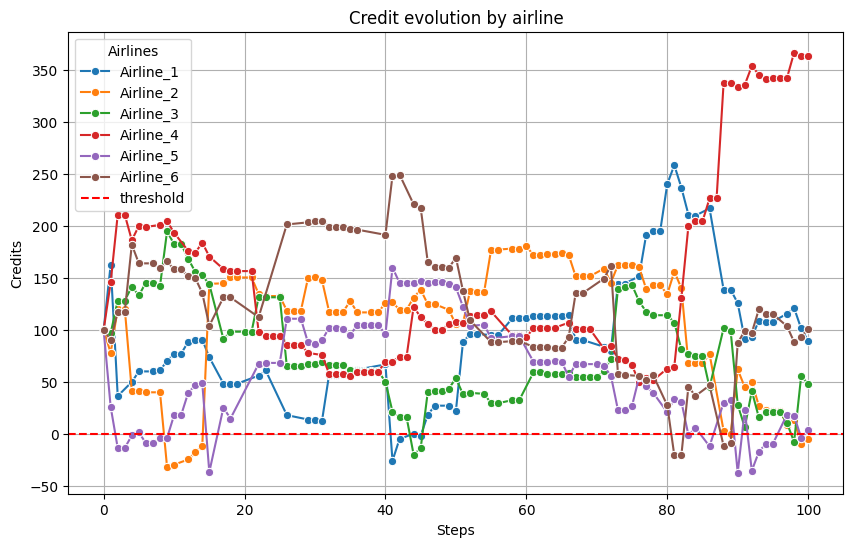

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your number of credits
credits_threshold = 0

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='step', y='Cumulative Sum', hue='airline', marker='o')

# Add the horizontal red line
plt.axhline(y=credits_threshold, color='r', linestyle='--', label='threshold')

plt.xlabel('Steps')
plt.ylabel('Credits')
plt.title('Credit evolution by airline')
plt.legend(title='Airlines')
plt.grid()
plt.show()